In [1]:
import pandas as pd 
import yfinance as yf
import matplotlib.pyplot as plt

In [7]:
df_yahoo = yf.download('WELL.TO', 
                       start='2010-01-01', 
                       end='2020-12-06',
                       progress=True)

[*********************100%***********************]  1 of 1 completed


In [3]:
import pandas as pd
import seaborn as sns
from fbprophet import Prophet

In [8]:
df = df_yahoo.copy()
df.reset_index(drop=False, inplace=True)
df.rename(columns={'Date': 'ds', 'Close': 'y'}, inplace=True)


In [9]:
train_indices = df.ds.apply(lambda x: x.year) < 2018
df_train = df.loc[train_indices].dropna()
df_test = df.loc[~train_indices].reset_index(drop=True)

In [10]:
#%%
model_prophet = Prophet(seasonality_mode='additive')
model_prophet.add_seasonality(name='monthly', period=30.5, 
                              fourier_order=5)
model_prophet.fit(df_train)


INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


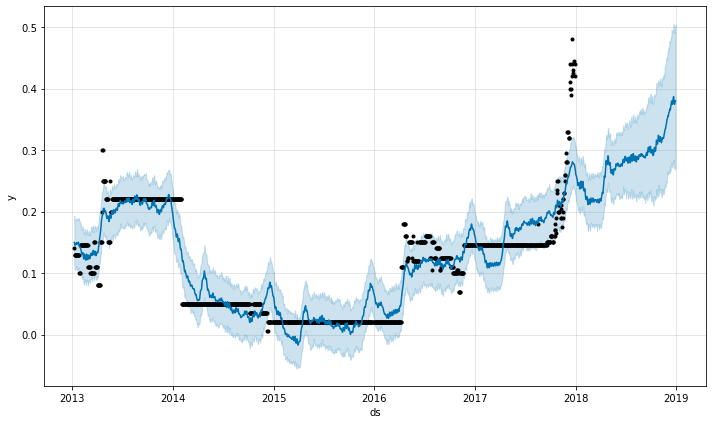

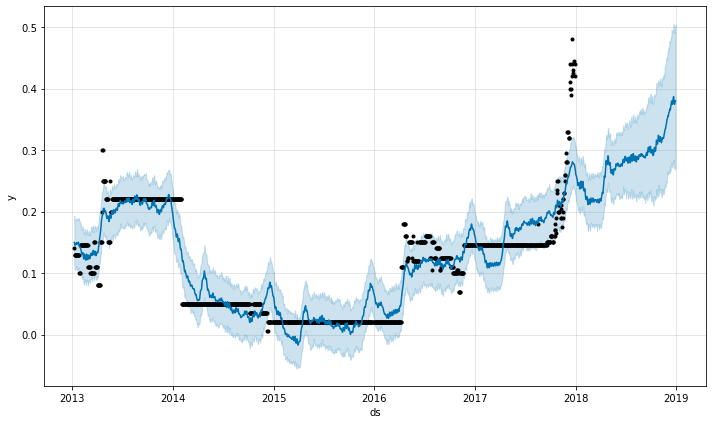

In [11]:
df_future = model_prophet.make_future_dataframe(periods=365)
df_pred = model_prophet.predict(df_future)
model_prophet.plot(df_pred)


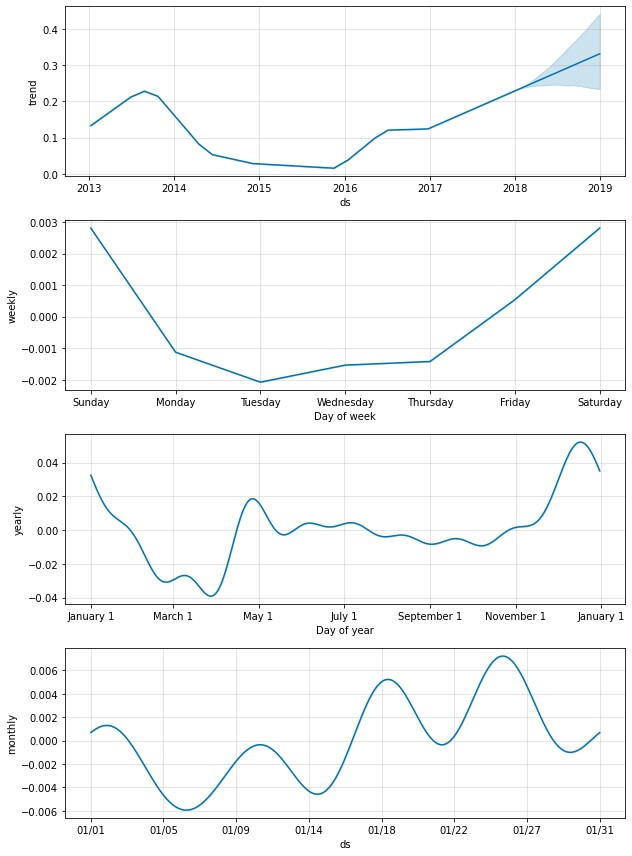

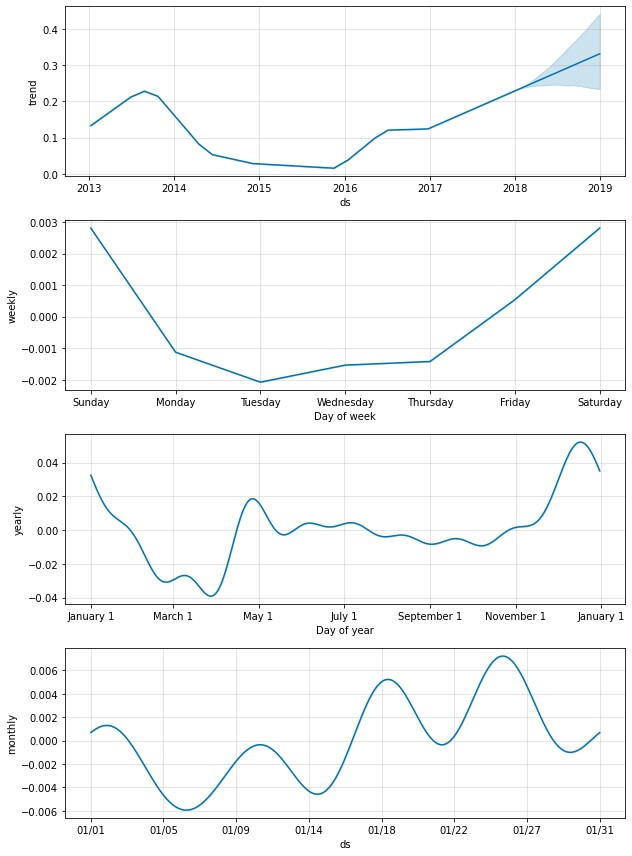

In [12]:
model_prophet.plot_components(df_pred)

In [ ]:
selected_columns = ['ds', 'yhat_lower', 'yhat_upper', 'yhat']

df_pred = df_pred.loc[:, selected_columns].reset_index(drop=True)
df_test = df_test.merge(df_pred, on=['ds'], how='left')
df_test.ds = pd.to_datetime(df_test.ds)
df_test.set_index('ds', inplace=True)

In [ ]:
fig, ax = plt.subplots(1, 1)

ax = sns.lineplot(data=df_test[['y', 'yhat_lower', 'yhat_upper', 
                                'yhat']])
ax.fill_between(df_test.index,
                df_test.yhat_lower,
                df_test.yhat_upper,
                alpha=0.3)
ax.set(title='Gold Price - actual vs. predicted',
       xlabel='Date',
       ylabel='Gold Price ($)')